# **Multiclass Text Classification**

Proyek ini menggunakan dataset yang terdapat pada link 
https://www.kaggle.com/datasets/anonymous1972/emotions. Dataset ini berisi kumpulan statement beserta emotionnya. proyek ini bertujuan untuk menentukan bentuk emosi berdasarkan statement yang ada.

# **Libraries**

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import nltk, os, re, string
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Export Data**

In [ ]:
df = pd.read_csv('Emotions.csv',encoding='cp1252')

# **Data exploration**

In [ ]:
df.head()

,Statement,Emotion
0,How the fu*k! Who the heck! moved my fridge!.....,anger
1,So my Indian Uber driver just called someone t...,anger
2,I asked for my parcel to be delivered to a pic...,anger
3,so ef whichever butt wipe pulled the fire alar...,anger
4,"Don't join they put the phone down on you, tal...",anger


In [ ]:
df.shape

(2827, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827 entries, 0 to 2826
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2827 non-null   object
 1   Emotion    2827 non-null   object
dtypes: object(2)
memory usage: 44.3+ KB


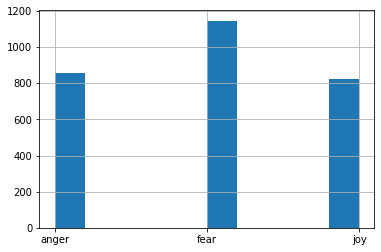

In [ ]:
df['Emotion'].hist()

# **Data Preprocessing & Data Cleaning**

In [ ]:
#Mengubah huruf kapital menjadi huruf kecil
#Menghilangkan tanda baca
#Filtering 
#Menghilangkan infleksi kata ke bentuk dasarnya

df.Statement = df.Statement.apply(lambda x: x.lower())
df.Statement = df.Statement.str.replace('(#[\d\w\.]+)', '')
df.Statement = df.Statement.str.replace('[^A-Za-z0-9\s]+', '')

def remove_punctuation(Statement):
    return(Statement.translate(str.maketrans('','', string.punctuation)))
    df.Statement= df.Statement.apply(lambda x: remove_punctuation(x))

lemmatizer = WordNetLemmatizer()
def lemmatizer(Statement):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(Statement.split())]))
    df.Statement = df.Statement.apply(lambda x: lemmatizer(x))

stopwords = stopwords.words()
def stopwords(Statement):
    return(' '.join([w for w in Statementsplit() if w not in stopwords]))
    df.Statement= df.Statement.apply(lambda x: stopwords(x))

stemmer = PorterStemmer()
def stemming(Statement):
    return (' '.join([stemmer.stem(w) for w in Statement.split()]))
    df.Statement = df.Statement.apply(lambda x: stemming(x))

def angka(Statement):
    return re.sub('[0-9]+','',Statement)
    df['Statement'].apply(angka)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


# **One Hot Encoding**

In [ ]:
category = pd.get_dummies(df.Emotion)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Emotion')
df_baru

,Statement,anger,fear,joy
0,how the fuk who the heck moved my fridge shoul...,1,0,0
1,so my indian uber driver just called someone t...,1,0,0
2,i asked for my parcel to be delivered to a pic...,1,0,0
3,so ef whichever butt wipe pulled the fire alar...,1,0,0
4,dont join they put the phone down on you talk ...,1,0,0
...,...,...,...,...
2822,its just the lack of company and liveliness ou...,0,0,1
2823,quinns short hair makes me sad,0,0,1
2824,hate overthinking e v e r y t h i n g like i j...,0,0,1
2825,people who cheer for sports teams completely o...,0,0,1


In [ ]:
text = df_baru['Statement'].values
label = df_baru[['anger', 'fear', 'joy']].values

# **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2)

# **Tokenization**

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_train) 
 
sekuens_train = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

# **Modelling**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.01),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_38 (Embedding)    (None, None, 16)          80000     
                                                                 
 lstm_38 (LSTM)              (None, 64)                20736     
                                                                 
 dense_154 (Dense)           (None, 128)               8320      
                                                                 
 dense_155 (Dense)           (None, 64)                8256      
                                                                 
 dense_156 (Dense)           (None, 32)                2080      
                                                                 
 dropout_69 (Dropout)        (None, 32)                0         
                                                                 
 dense_157 (Dense)           (None, 3)               

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
)

Fungsi Callback

In [ ]:
class mycallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = None):
    if logs.get('accuracy') >= 0.95:
      print('\nEpoch', epoch, '\nAccuracy has reached = %2.2f%%' %(logs['accuracy']*100), 'so training is cancelled')
      self.model.stop_training = True

In [ ]:
num_epochs = 50
history = model.fit(padded_train,
                    label_train,
                    epochs=num_epochs, 
                    validation_data=(padded_test, label_test),
                    verbose=1,
                    callbacks = [mycallbacks()]
)

Epoch 1/50
71/71 [==============================] - 3s 21ms/step - loss: 1.0850 - accuracy: 0.4144 - val_loss: 1.0877 - val_accuracy: 0.3675
Epoch 2/50
71/71 [==============================] - 1s 15ms/step - loss: 0.8411 - accuracy: 0.5984 - val_loss: 0.7958 - val_accuracy: 0.6714
Epoch 3/50
71/71 [==============================] - 1s 15ms/step - loss: 0.2716 - accuracy: 0.9120 - val_loss: 0.7280 - val_accuracy: 0.7509
Epoch 4/50
68/71 [===========================>..] - ETA: 0s - loss: 0.0829 - accuracy: 0.9738
Epoch 3 
Accuracy has reached = 97.30% so training is cancelled
71/71 [==============================] - 1s 17ms/step - loss: 0.0854 - accuracy: 0.9730 - val_loss: 0.6452 - val_accuracy: 0.7915


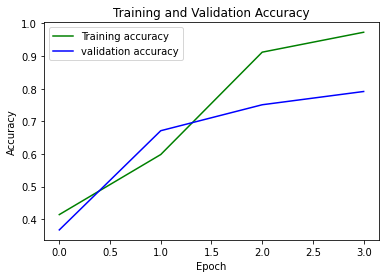

In [ ]:
my_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(my_accuracy, 'g', label='Training accuracy')
plt.plot(validation_accuracy, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

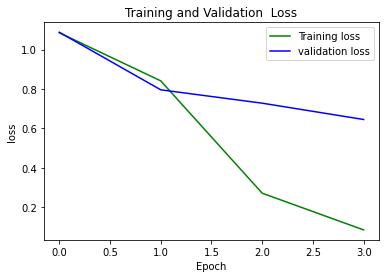

In [ ]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, 'g', label='Training loss')
plt.plot(validation_loss , 'b', label='validation loss')
plt.title('Training and Validation  Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()